In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_csv('dev.csv')

In [41]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


<Axes: >

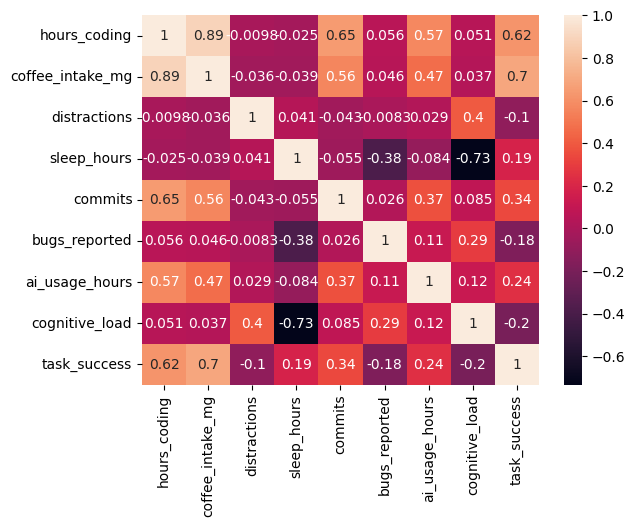

In [42]:
sns.heatmap(df.corr(),annot=True)

In [43]:
df.shape

(500, 9)

In [44]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


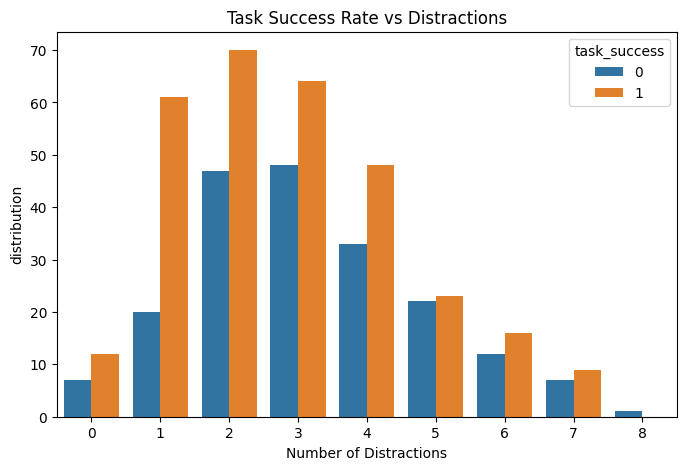

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='distractions', hue='task_success', data=df)
plt.title('Task Success Rate vs Distractions')
plt.xlabel('Number of Distractions')
plt.ylabel('distribution')
plt.show()


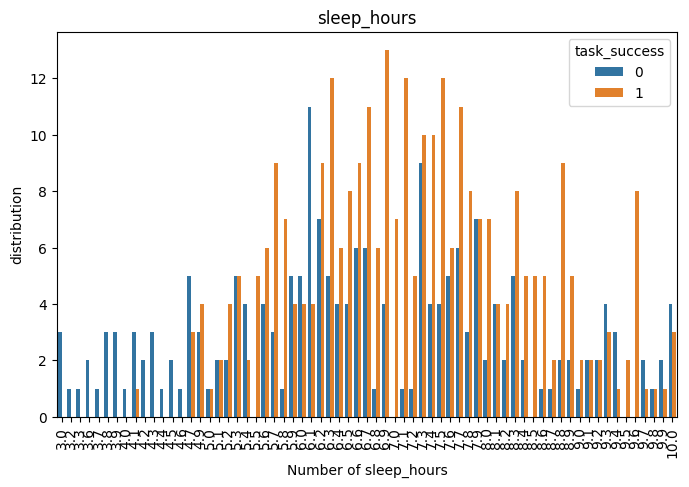

In [46]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sleep_hours', hue='task_success', data=df)
plt.title('sleep_hours')
plt.xlabel('Number of sleep_hours')
plt.xticks(rotation=90)
plt.ylabel('distribution')
plt.show()


In [47]:
x=df.drop(['distractions','task_success'],axis=1)

In [48]:
y=df['task_success']

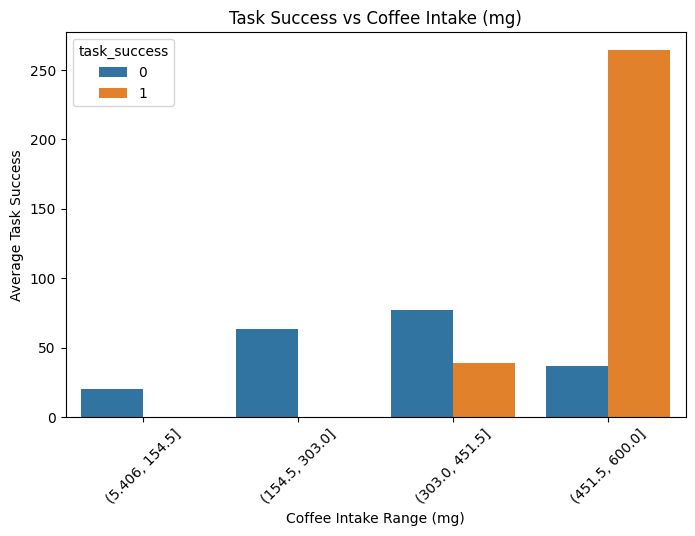

In [49]:
plt.figure(figsize=(8, 5))
# Optional: bin coffee intake for clearer bars
df['coffee_bin'] = pd.cut(df['coffee_intake_mg'], bins=4)

sns.countplot(x='coffee_bin', hue='task_success', data=df)
plt.title('Task Success vs Coffee Intake (mg)')
plt.xlabel('Coffee Intake Range (mg)')
plt.ylabel('Average Task Success')
plt.xticks(rotation=45)
plt.show()



In [50]:
x

,hours_coding,coffee_intake_mg,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
0,5.99,600,5.8,2,1,0.71,5.4
1,4.72,568,6.9,5,3,1.75,4.7
2,6.30,560,8.9,2,0,2.27,2.2
3,8.05,600,6.3,9,5,1.40,5.9
4,4.53,421,6.9,4,0,1.26,6.3
...,...,...,...,...,...,...,...
495,6.08,594,5.3,3,0,0.91,6.8
496,2.93,382,6.7,3,2,1.38,5.9
497,4.62,494,7.5,2,0,0.41,4.5
498,3.25,296,6.9,1,0,1.52,6.3


In [51]:
x_round=x[x.select_dtypes(include='float').columns] = x.select_dtypes(include='float').round().astype(int)


In [52]:
y.value_counts()

task_success
1    303
0    197
Name: count, dtype: int64

In [53]:
x['coffee_intake_mg'] = x['coffee_intake_mg'].round().astype(int)


In [54]:
x

,hours_coding,coffee_intake_mg,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
0,6,600,6,2,1,1,5
1,5,568,7,5,3,2,5
2,6,560,9,2,0,2,2
3,8,600,6,9,5,1,6
4,5,421,7,4,0,1,6
...,...,...,...,...,...,...,...
495,6,594,5,3,0,1,7
496,3,382,7,3,2,1,6
497,5,494,8,2,0,0,4
498,3,296,7,1,0,2,6


In [55]:
x

,hours_coding,coffee_intake_mg,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
0,6,600,6,2,1,1,5
1,5,568,7,5,3,2,5
2,6,560,9,2,0,2,2
3,8,600,6,9,5,1,6
4,5,421,7,4,0,1,6
...,...,...,...,...,...,...,...
495,6,594,5,3,0,1,7
496,3,382,7,3,2,1,6
497,5,494,8,2,0,0,4
498,3,296,7,1,0,2,6


In [56]:
x[x.select_dtypes(include='float').columns] = x.select_dtypes(include='float').round().astype(int)

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)

In [61]:
x_train

,hours_coding,coffee_intake_mg,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
435,5,490,9,8,0,1,2
54,7,600,6,6,2,1,5
154,6,600,7,2,0,0,5
71,8,600,8,8,1,1,2
195,6,562,5,7,0,1,5
...,...,...,...,...,...,...,...
153,5,491,8,11,1,1,6
172,5,467,8,4,1,1,4
280,5,532,8,6,1,0,2
375,3,436,5,5,2,2,6


In [62]:
random = RandomForestClassifier(n_estimators=100, random_state=42)
random.fit(x_train, y_train)

y_pred3 = random.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))


0.92
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.92      0.95      0.94        61

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100

[[34  5]
 [ 3 58]]


In [63]:
train_acc = random.score(x_train, y_train)
test_acc = random.score(x_test, y_test)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy: {test_acc:.3f}")

if train_acc > test_acc + 0.1:
    print("Warning: Overfitting detected! 🐍")
elif train_acc < 0.7 and test_acc < 0.7:
    print("Warning: Underfitting detected! 🐢")
else:
    print("Model fit looks good! 👍")

Training Accuracy: 1.000
Testing Accuracy: 0.920
Model fit looks good! 👍


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

model = RandomForestClassifier()
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(x, y)

print("Best Params:", grid.best_params_)
print("Best Cross-Validated Score:", grid.best_score_)


Best Params: {'max_depth': None, 'n_estimators': 50}
Best Cross-Validated Score: 0.9380000000000001


In [65]:
import joblib


In [67]:
joblib.dump(grid.best_estimator_, 'random.pkl')
print("Model saved!")

Model saved!
